## Import libraries

In [1]:
from prob_model import probab, random_walk
from diff_eq import linearization_sol as diff
from plots import plotter 
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('ggplot')

Assumptions:

 - The prey population finds ample food at all times.
 - The food supply of the predator population depends entirely on the size of the prey population.
 - The rate of change of population is proportional to its size.
 - During the process, the environment does not change in favour of one species, and genetic adaptation is inconsequential.
 - Predators have limitless appetite.

### Differential equation model

#### Input variables:

In [2]:
α, β, γ, δ = 1.1, 0.4, 0.4, 0.1
xs = [10, 10, 20, 15]
ys = [10, 20, 5, 5] 

In [4]:
rabbits, foxes, xs, ys = diff.multi_init_rabbit_fox_env(xs, ys, α, β, γ, δ)

In [ ]:
# Takes long time to run
plotter.multi_phase_plot_rabbit_fox(rabbits, foxes, xs, ys)

### Probablistic model

In [144]:
## probs are the mingling probabilities that depend on the temperatures

In [146]:
if __name__ == '__main__':
    xs = [10, 10, 20, 15]
    ys = [10, 20, 5, 5] 
    θ = np.random.beta(1, 10)
    δ = np.random.beta(1, 5)
    χ = np.random.beta(1, 10)
    # reproduction rate per 1 prey eaten
    γ = np.random.beta(1, 10)
    
    temp, probs = random_walk.mean_revert_rand_walk_gausian_step()
    rabbits = []; foxes = []
    for x0, y0 in zip(xs, ys):
        rabbit = []; fox = []
        rabbit.append(x0); fox.append(y0)
        for idx, _ in enumerate(temp, start=1):
#           print('rabbit population: ', rabbit[-1])

            rab_growth = probab.growth_abs(rabbit, idx, δ)
#           print('rabbit growth: ', rab_growth)
            rab_mort = probab.mort_prey(probs, θ, idx, rabbit, fox)  
#           print('rabbit mortality: ', rab_mort)

            rabbit.append(rabbit[idx - 1]
                          + rab_growth
                          - rab_mort)

            if (rabbit[-1] <= 1):
                break

#           print('fox population: ', fox[-1])

            fox_rep = probab.reproduce(γ, rab_mort, fox[idx - 1])
            fox_mort = probab.spieces_mort(fox, idx, χ)

            fox.append(fox[idx - 1]   
                       + fox_rep
                       - fox_mort)

            if (fox[-1] <= 1):
                break
        rabbits.append(rabbit); foxes.append(fox) 

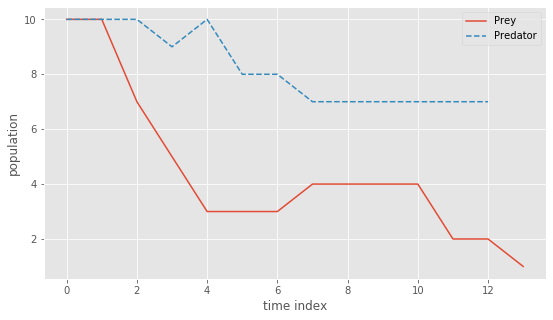

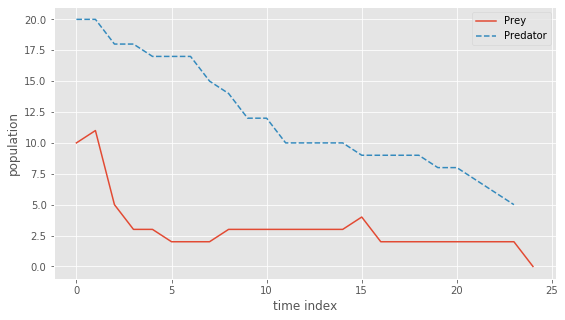

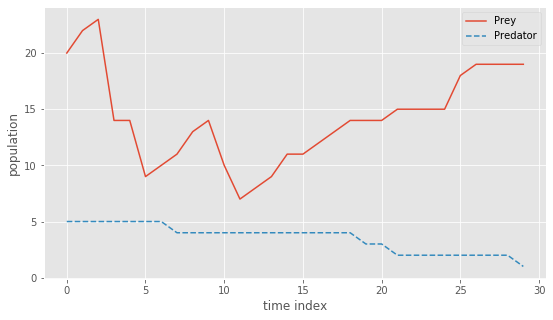

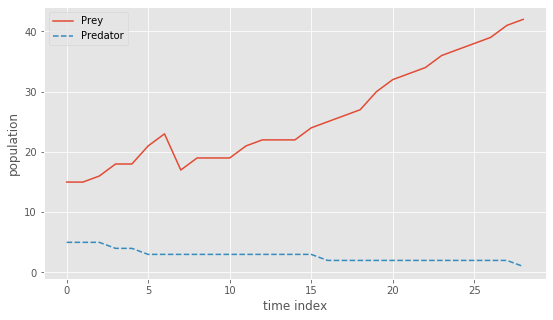